## 1

In [2]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=9137384de54ebf0366aed4890edb60cb1626551ceb3725c0849d7c44eae3c676
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling char

In [3]:
!pip install googletrans==4.0.0-rc1 #to avoid 'NoneType' object has no attribute 'group' error
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=26f18679e5b46f7ac7717a6719cac71e28044ba6beaf67ea3e2f1afc526395df
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=ebd44caac795201d24321c052ac518f1994cb5e0a32be0c24c0e419c89349698
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 4.0.0rc1
    Uninstalling googletrans-4.0.0rc1:
      Successful

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from googletrans import Translator

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# Membaca data dari file CSV
df_sentimen = pd.read_csv('/content/drive/MyDrive/ABD/IMDB_Dataset.csv')
print(df_sentimen.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
# Filter data untuk hanya menyertakan sentimen 'positive' dan 'negative'
df_sentimen_filtered = df_sentimen[df_sentimen['sentiment'].isin(['positive', 'negative'])]

In [8]:
# Konversi 'positive' menjadi 1 dan 'negative' menjadi 0
df_sentimen_filtered['sentiment'] = df_sentimen_filtered['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [9]:
print(df_sentimen_filtered.head())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [10]:
# Bersihkan nilai yang tidak valid (jika ada)
df_sentimen_cleaned = df_sentimen_filtered.dropna(subset=['review', 'sentiment'])

In [11]:
# Pisahkan data untuk pemodelan
X = df_sentimen_cleaned['review']
y = df_sentimen_cleaned['sentiment']

In [12]:
# Membagi data, 70% untuk training, 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training data rows:", len(X_train), "; Testing data rows:", len(X_test))

Training data rows: 35000 ; Testing data rows: 15000


In [13]:
# Inisialisasi tokenizer, stop words remover, hashing TF, dan IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

In [14]:
# Transformasi data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
# Model Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [18]:
# Prediksi dengan data testing menggunakan model Naive Bayes
predictions_nb = nb.predict(X_test_tfidf)

In [19]:
# Menghitung akurasi untuk model Naive Bayes
accuracy_nb = accuracy_score(y_test, predictions_nb)
print("Naive Bayes Model")
print("Accuracy:", accuracy_nb)

Naive Bayes Model
Accuracy: 0.8549333333333333


In [20]:
# Model Regresi Logistik
lr = LogisticRegression(max_iter=10)
lr.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [21]:
# Prediksi dengan data testing menggunakan model Regresi Logistik
predictions_lr = lr.predict(X_test_tfidf)

In [22]:
# Menghitung akurasi untuk model Regresi Logistik
accuracy_lr = accuracy_score(y_test, predictions_lr)
print("Logistic Regression Model")
print("Accuracy:", accuracy_lr)

Logistic Regression Model
Accuracy: 0.8704666666666667


In [23]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(nb, '/content/drive/MyDrive/ABD/sentiment_model_nb.pkl')
joblib.dump(lr, '/content/drive/MyDrive/ABD/sentiment_model_lr.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/ABD/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/ABD/tfidf_vectorizer.pkl']

In [24]:
# Menambahkan bagian untuk menerjemahkan bahasa menggunakan library googletrans
translator = Translator()

In [25]:
# Fungsi untuk menerjemahkan review ke bahasa Indonesia
def translate_to_indonesian(text):
    translation = translator.translate(text, dest='id')
    return translation.text

In [26]:
# Contoh penerjemahan
translated_reviews = X_test.apply(translate_to_indonesian)
print(translated_reviews.head())

33553    Saya sangat menyukai Summerslam ini karena tam...
9427     Tidak banyak acara televisi yang menarik banya...
199      Film ini dengan cepat mencapai adegan kejar-ke...
12447    Jane Austen pasti akan menyetujui yang satu in...
39489    Harapan saya agak tinggi ketika saya menonton ...
Name: review, dtype: object


In [27]:
!pip install wordcloud

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

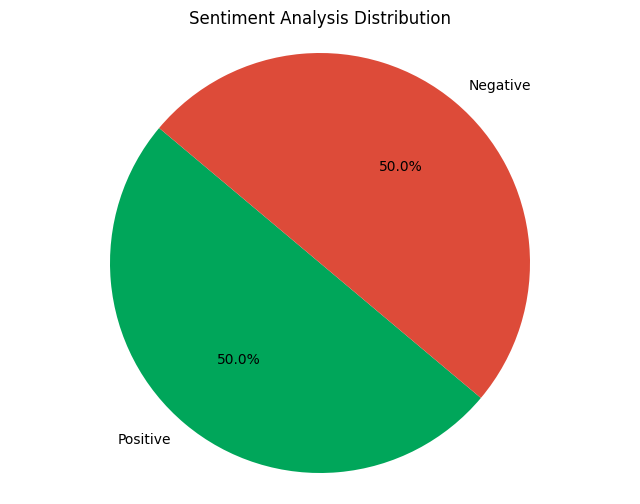

In [29]:
# Visualisasi analisis sentimen dengan pie chart
sentiment_counts = df_sentimen_cleaned['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, colors=['#00a65a', '#dd4b39'])
plt.title('Sentiment Analysis Distribution')
plt.axis('equal')
plt.show()

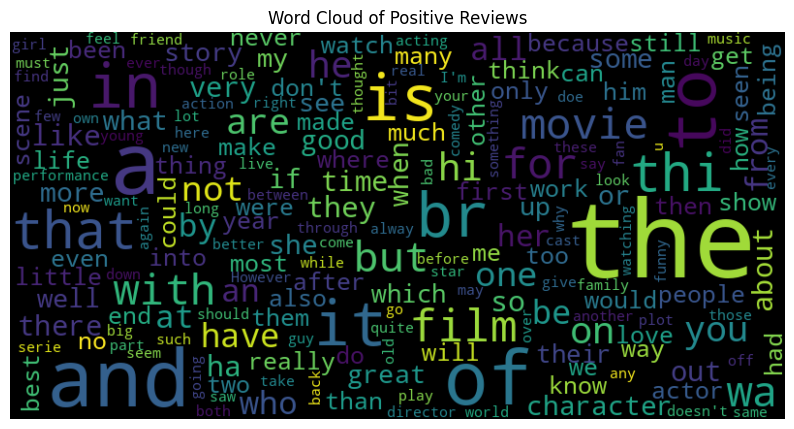

In [31]:
# Membuat word cloud untuk positive review
positive_reviews = df_sentimen_cleaned[df_sentimen_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False, stopwords='english').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()